In [146]:
#Matt Mancuso Machine Learning with Heart Data
#In this analysis, I'm using three Machine Learning Models to see which is the most accurate to predict the "output" given the inputs
import numpy as np

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
data = pd.read_csv("heart.csv")

In [149]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [151]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [152]:
data_missing = data.isna().sum()
data_missing

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [153]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


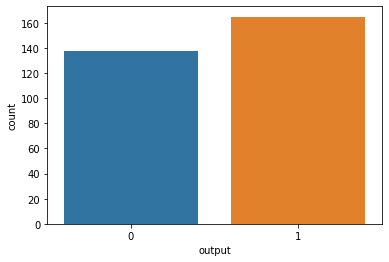

In [154]:
sns.countplot(x="output", data= data)

In [155]:
corr_graph=data.corr()
corr_graph

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


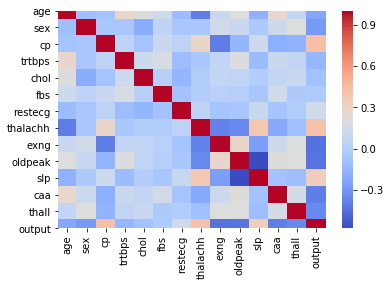

In [156]:
sns.heatmap(data.corr(),cmap = 'coolwarm')

In [157]:
lines_deleted = corr_graph.drop("age", axis =1)
lines_deleted

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [158]:
lines_deleted1=corr_graph.drop("sex", axis =1)

In [159]:
features =["age","sex","cp",'trtbps','chol','fbs',"restecg",'thalachh','exng','oldpeak','slp','caa','thall']
ML = ["output"]

In [160]:
lines_deleted= corr_graph.drop(features,axis =1)

In [161]:
lines_deleted

,output
age,-0.225439
sex,-0.280937
cp,0.433798
trtbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalachh,0.421741
exng,-0.436757
oldpeak,-0.430696


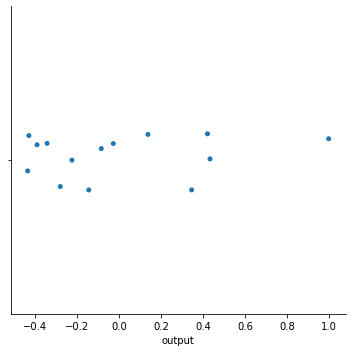

In [162]:
sns.catplot(x="output",data =lines_deleted)

<Figure size 7200x7200 with 0 Axes>

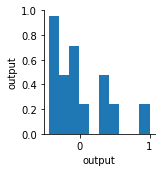

In [163]:
plt.figure(figsize = (100,100))
sns.pairplot(lines_deleted)

In [164]:
x = data.drop("output", axis = 1)
y = data["output"]

In [165]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [166]:
#Log Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [167]:
log_model = LogisticRegression()

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [169]:
log_model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
predictions = log_model.predict(x_test)

In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [172]:
cm = confusion_matrix(y_test,predictions)
cm

array([[18,  8],
       [ 4, 31]])

In [173]:
accuracy_score(predictions,y_test)

0.8032786885245902

In [174]:
from sklearn.metrics import classification_report
classification_report(predictions,y_test)

'              precision    recall  f1-score   support\n\n           0       0.69      0.82      0.75        22\n           1       0.89      0.79      0.84        39\n\n    accuracy                           0.80        61\n   macro avg       0.79      0.81      0.79        61\nweighted avg       0.82      0.80      0.81        61\n'

In [175]:
#Decision Tree 

In [176]:
data_tree= data[:]

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.2)

In [178]:
print (x_test.shape,x_train.shape)
print (y_test.shape,y_train.shape)

(61, 13) (242, 13)
(61,) (242,)


In [179]:
from sklearn.tree import DecisionTreeClassifier
ModelTree = DecisionTreeClassifier(max_depth =3)
from sklearn import tree

In [180]:
ModelTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [181]:
prediction = ModelTree.predict(x_test)

In [182]:
prediction

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [183]:
accuracy_score(prediction,y_test)

0.8032786885245902

In [184]:
confusion_matrix(prediction, y_test)

array([[19,  0],
       [12, 30]])

In [185]:
classification_report(prediction, y_test)

'              precision    recall  f1-score   support\n\n           0       0.61      1.00      0.76        19\n           1       1.00      0.71      0.83        42\n\n    accuracy                           0.80        61\n   macro avg       0.81      0.86      0.80        61\nweighted avg       0.88      0.80      0.81        61\n'

In [186]:
from sklearn.tree import plot_tree

In [187]:
vari = list(data_tree)
vari

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

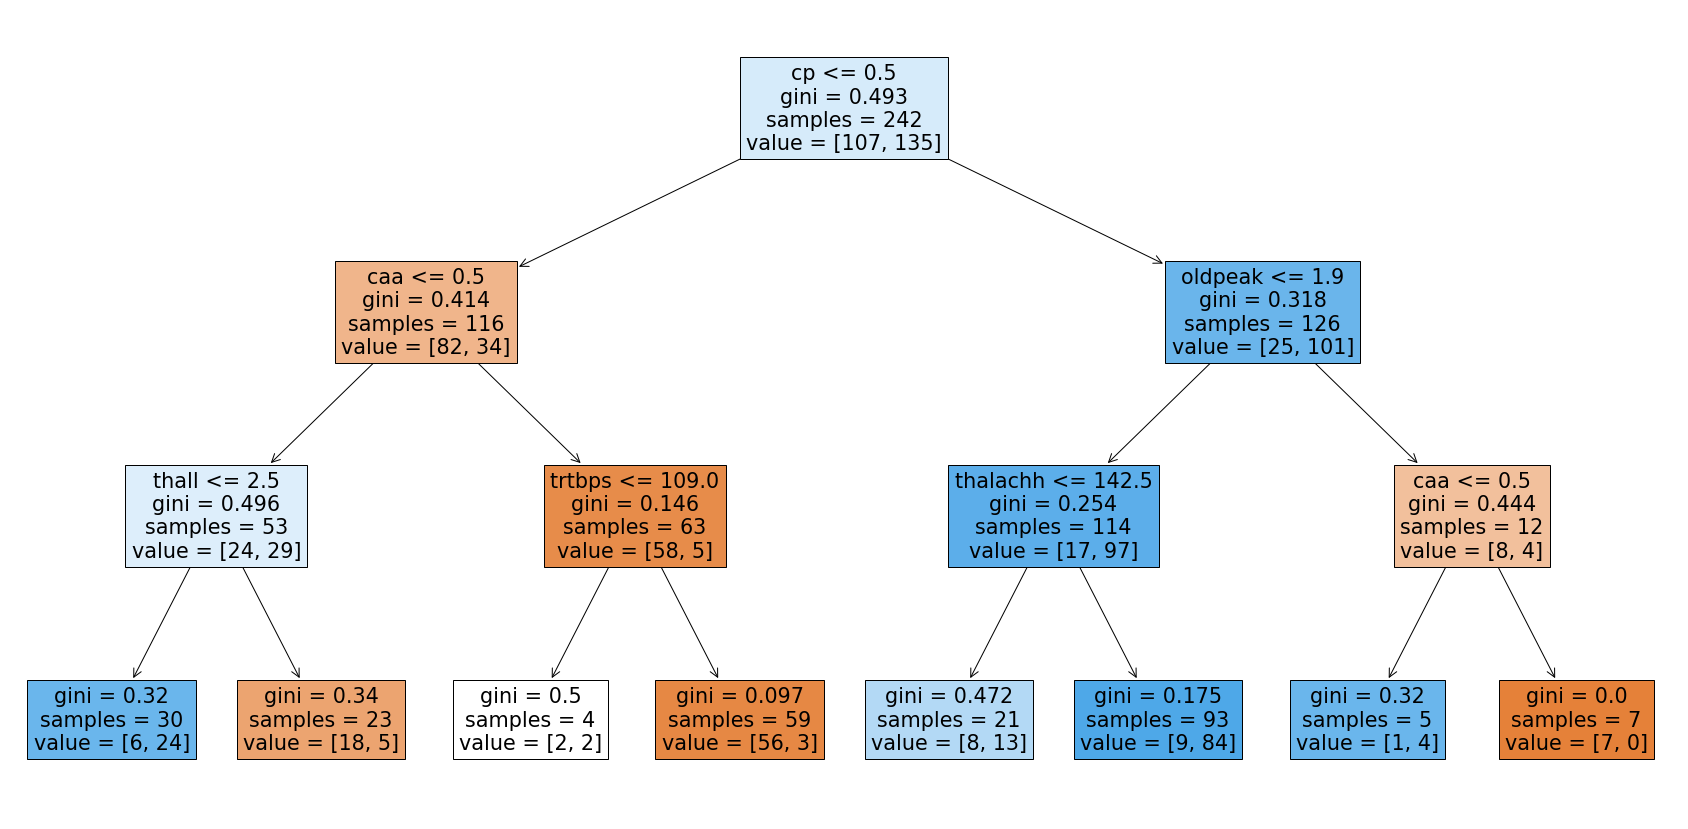

In [188]:
plt.figure(figsize = (30,15))
a = plot_tree(ModelTree, feature_names = vari, filled = True)

In [189]:
#Naive Bayes Model

In [201]:
from sklearn.naive_bayes import GaussianNB
dataNB = GaussianNB()

In [202]:
train, test = train_test_split(data, test_size =0.2)
print(train.shape)
print(test.shape)
x_train = train[data.columns]
y_train = train['output']
testx= test[data.columns]
testy = test['output']
print(x_train.shape, y_train.shape)
print(testx.shape,testy.shape)

(242, 14)
(61, 14)
(242, 14) (242,)
(61, 14) (61,)


In [211]:
dataNB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [212]:
predicted_data= dataNB.predict(testx)
expected_data = testy

In [213]:
accuracy_score(predicted_data,expected_data)

1.0

In [216]:
Cm1= confusion_matrix(expected_data, predicted_data)
Cm1

array([[26,  0],
       [ 0, 35]])

In [217]:
classification_report(prediction,y_test)

'              precision    recall  f1-score   support\n\n           0       0.61      1.00      0.76        19\n           1       1.00      0.71      0.83        42\n\n    accuracy                           0.80        61\n   macro avg       0.81      0.86      0.80        61\nweighted avg       0.88      0.80      0.81        61\n'